-Identify earliest point of divergence for all movies, all movies except coax-bill, coax-bill and rand


Rekha Varrier - 2021

In [1]:
# import packages, check folders
#%reset
from pathlib import Path
import os
import numpy as np
import h5py
import pandas as pd
#import imagesc as imagesc #pip install imagesc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import time
import pickle

%matplotlib inline

working_dir = '/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code'
#working_dir = os.getcwd()
print('current directory:\n',working_dir)
path = Path(working_dir)
parent_folder = path.parent
#print('parent folder:', parent_folder)
data_file_loc = os.path.join(parent_folder,'data') # to store data we extract later in this notebook

current directory:
 /Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/fMRIScipts/code


In [2]:
# setting default fontsizes for plots

s=16 # CHANGE FONTSIZE HERE

plt.rc('font', size=s) #controls default text size
plt.rc('axes', titlesize=s) #fontsize of the title
plt.rc('axes', labelsize=s) #fontsize of the x and y labels
plt.rc('xtick', labelsize=s) #fontsize of the x tick labels
plt.rc('ytick', labelsize=s) #fontsize of the y tick labels
plt.rc('legend', fontsize=s) #fontsize of the legend
plt.rcParams['savefig.facecolor']='white'
#import matplotlib as mpl
#mpl.rcParams['font.weight']= 'normal'



In [3]:
# get the right red/blue shades
#red_rgb = [103,0,31] # edges of RdBu
#blue_rgb = [5,48,97] # edges of RdBu
red_rgb =[188,61,62] # from Emily
blue_rgb = [54,122,177] # from Emily
red_rgb = np.array(red_rgb)/255
blue_rgb = np.array(blue_rgb)/255
alpha = .2 # transparency inside boxplots, for datapts etc.

In [4]:
# vid names as saved in behavioral data

vidnames = ["COAXING-B", "BILLIARD-A", "DRIFTING-A", "Fishing", "Random mechanical", 
            "Scaring", "SEDUCING-B", "STAR-A", "SURPRISING-B", "TENNIS-A"]


In [5]:
#loading shen atlas labels

pd.set_option('display.max_colwidth', None) # so columns are not snipped

# loading the Shen atlas labels
shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))

shen268_lbl.head()

# to print an ROI: eval(shen268[str(insert ROI val between 1-268)][0])['name']

,1,2,3,4,5,6,7,8,9,10,...,259,260,261,262,263,264,265,266,267,268
0,"{'coords': [14.083200000000005, 56.6944, -16.684799999999996], 'name': '92.80% Frontal_Pole; 7.20% Frontal_Medial_Cortex'}","{'coords': [9.599999999999994, 17.61882352941177, -19.53411764705882], 'name': '60.56% Subcallosal_Cortex; 38.73% Frontal_Orbital_Cortex'}","{'coords': [5.270633397312864, 35.03262955854126, -17.5278310940499], 'name': '58.54% Frontal_Medial_Cortex; 34.55% Subcallosal_Cortex'}","{'coords': [15.647840531561457, 34.18604651162792, -22.544850498338867], 'name': '54.15% Frontal_Pole; 41.86% Frontal_Orbital_Cortex'}","{'coords': [8.283887468030684, 46.05882352941177, -1.6700767263427139], 'name': '47.25% Paracingulate_Gyrus; 25.03% Cingulate_Gyrus_anterior_division; 16.35% Frontal_Medial_Cortex; 10.86% Frontal_Pole'}","{'coords': [14.581460674157299, 64.75280898876406, 3.682584269662925], 'name': '100.00% Frontal_Pole'}","{'coords': [30.41914191419142, 54.79537953795381, -3.3267326732673297], 'name': '100.00% Frontal_Pole'}","{'coords': [44.469325153374236, 46.095092024539866, -4.917177914110425], 'name': '99.85% Frontal_Pole'}","{'coords': [28.814814814814817, 51.163163163163176, 18.73473473473473], 'name': '100.00% Frontal_Pole'}","{'coords': [8.521081081081078, 53.28, 23.885405405405407], 'name': '48.54% Frontal_Pole; 32.43% Paracingulate_Gyrus; 19.03% Superior_Frontal_Gyrus'}",...,"{'coords': [-10.399527186761233, 10.877068557919614, -8.056737588652481], 'name': '20.66% Subcallosal_Cortex; 19.95% Left_Putamen; 19.83% Left_Accumbens; 14.40% Left_Caudate; 13.81% no_label; 5.67% Frontal_Orbital_Cortex'}","{'coords': [-14.491582491582491, -3.54882154882155, 20.909090909090907], 'name': '55.03% Left_Caudate; 29.53% Left_Lateral_Ventrical; 11.07% Left_Thalamus'}","{'coords': [-24.77079107505071, 5.537525354969574, -0.07302231237322587], 'name': '96.96% Left_Putamen'}","{'coords': [-9.427230046948353, -25.539906103286384, -1.3755868544600958], 'name': '72.56% Left_Thalamus; 21.40% Brain-Stem; 5.58% no_label'}","{'coords': [-4.68474576271187, -10.2406779661017, 5.877966101694909], 'name': '82.71% Left_Thalamus; 13.90% Left_Lateral_Ventrical'}","{'coords': [-11.407792207792212, -25.563636363636363, 14.883116883116884], 'name': '61.82% Left_Thalamus; 31.43% Left_Lateral_Ventrical'}","{'coords': [-4.821052631578951, -21.51157894736842, -15.890526315789472], 'name': '71.16% Brain-Stem; 25.89% no_label'}","{'coords': [-4.227272727272734, -37.89772727272728, -53.26704545454545], 'name': '100.00% Brain-Stem'}","{'coords': [-6.9375, -33.13068181818181, -39.34659090909091], 'name': '99.15% Brain-Stem'}","{'coords': [-5.697885196374628, -18.966767371601208, -36.81570996978852], 'name': '100.00% Brain-Stem'}"


In [6]:
# load responses (nsubs * nmovies, values 0 for "no", 1 for "yes", "9" for unsure )
responses = np.load(os.path.join(data_file_loc,'responses.npy'))
responses[0,:]

array([nan,  0.,  1., nan, nan,  1.,  1.,  0.,  1.,  9.])

In [13]:
# save responses as texts with "Social", "Nonsocial" and "Neither" (so only for social v. non social comparisons) - useful for LMEs
responses_txt = []
for m in range(10):
    temp_txt = []
    temp = responses[:,m]
    for t in temp:
        if ~np.isnan(t):
            if int(t) == 1:
                temp_txt.append('Social')
            elif int(t) == 0:
                temp_txt.append('Nonsocial')
            else:
                temp_txt.append('Neither')
                
        else:
            temp_txt.append('Neither')

    responses_txt.append(temp_txt) # list of 10, each item has 1048 elements

In [7]:
tr0_ind = 3 # ind at which tr=0 starts
[timepts_indiv_movie,vid_start_rel_tr] = np.load(os.path.join(data_file_loc,'Video_TRs.npy'),allow_pickle=True)
print(vid_start_rel_tr)
l_task = 28

def remove_pretrial_TRs(tcs,vid_start_rel_tr,pretrial_TRs):

    tcs1 = np.empty((tcs.shape[0],tcs.shape[1],28+pretrial_TRs,tcs.shape[3]))
    tcs1[:] = np.nan

    for vid_no in range(10):
        tr0 = vid_start_rel_tr[vid_no]
        tcs1[:,:,:,vid_no] = tcs[:,:,tr0-pretrial_TRs:tr0+28,vid_no] # 31 timepts
    return tcs1

[7 14 14 14 14 7 14 14 14 14]


## PAN-MOVIES ANALYSIS

# Compute and plottimepts of divergences within and between movies

In [1]:
#select subs who responded "social" to the yes movie and nonsocial to the no movie

print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_run_norm','timecourse-all-movies_zscorenorm.npy') # load fmri data
tcs_run_z = np.load(fileName) # nsubs * nnodes * ntimepts *nmovies
print('before:',tcs_run_z.shape)
tcs_run_z = remove_pretrial_TRs(tcs_run_z,vid_start_rel_tr,tr0_ind)
print('after:',tcs_run_z.shape)


trial-wise norm data.


NameError: name 'data_file_loc' is not defined

In [10]:
# first of all, best to remove subjects with < 10 responses for power in general (and to keep consistent with beh results on all movies)
count_resp = np.zeros((responses.shape[0],))
for i in range(responses.shape[0]):
    count_resp[i] = len(np.where(~np.isnan(responses[i,:]))[0]) # nr. of responses per sub
#subs_10resp = np.where(count_resp == 10)[0]
subs_10resp = count_resp == 10
nsubs = len(np.where(subs_10resp)[0])
len(np.where(subs_10resp)[0])

814

In [11]:
# for all movies social v. non-social, we need an LME to compare between social and nonsocial groups
#install lme functions
from pymer4.models import Lmer
#from pymer4.models import Lm
import time
from multiprocessing import Pool
from joblib import cpu_count

In [14]:
# preparing for the lme by defining the long 1Darray
responses_txt_col=[] # store responses as a long 1D array (list)
subID = []
movie = []
for m in range(10):
    responses_txt_col.extend(list(np.array(responses_txt[m])[subs_10resp]))
    subID.extend(np.where(subs_10resp)[0])
    movie.extend(np.repeat(m,nsubs))
len(responses_txt_col),len(subID),len(movie)

(8140, 8140, 8140)

In [15]:
# in theory we can combine htis and the later code snippet with AUC - but it's nice to have this funtction like this so we can visualize all sig nodes!! (same for rand and coax-bill too)
def lme_across_time(tcs_run_z_node):
    # takes a nodes' timecourse (input dims: subjects * timepts * movies) and performs and LME on the Social vs. Non-social responses across all movies
    # returns a list of [reg coefft, pvalue] - each list elemnet has a length of 31 (i.e., same as tcs_runs_z.shapep[2])
    # in the output, timepts at which the LME did not converge are assigned an np.nan, others have respective values
    # 
    coef_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    coef_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   
    rows = []
    for m in range(10):
        rows.append(np.arange(m*nsubs,(m+1)*nsubs))

    bold = np.empty((nsubs*10,))
    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        bold[:] = np.nan
        for m in range(10):
            bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
        
        if timept == tr0_ind:
            df = pd.DataFrame({'BOLD':bold,'response':responses_txt_col,'subID':subID,'movie':movie})
        
        else:
            df.loc[:,'BOLD'] = bold
        
        df1 = df.loc[df['response']!= 'Neither',:] # yes v no, all movies, remove all other resposnes
        try:
            model = Lmer('BOLD ~  response +(1|subID)', data=df1) # ff: mean response, rf:subjID
            model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)
            
            if len(model.warnings) == 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
                coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = model.coefs['Estimate'][1],  model.coefs['P-val'][1]
            
            else: # don't save coefs if there were warnings, but print the warning
                print(model.warnings,'timept:', timept)
        except:
            coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = [np.nan]*2
            
    return coef_soc_nonsoc,pval_soc_nonsoc

In [1574]:
# test fn above
#tcs_node_list = [tcs_run_z[:,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
#b =lme_across_time(tcs_node_list[0])

In [17]:
# Yes v No
load = 1

if load:
    coef_pval_soc_nonsoc = np.load(os.path.join(data_file_loc,'coefs_pvals_alltimepts_allmovies.npy'))
    print('Loaded..')
else:
    if __name__ == '__main__':
        pool = Pool(processes=cpu_count()) # helps to parallelize processing

    tcs_node_list = [tcs_run_z[:,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
    coef_pval_soc_nonsoc = pool.map(lme_across_time,tcs_node_list) 
    np.save(os.path.join(data_file_loc,'coefs_pvals_alltimepts_allmovies.npy'), coef_pval_soc_nonsoc)

    print('LME done.')

Loaded..


Text(0.5, 1.0, 'ALL MOVIES, diverging timepts')

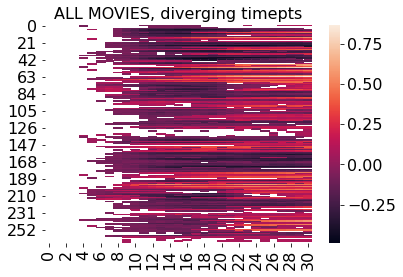

In [19]:
# organize into a 2D array, change non-sig (p<.05unc.) values to nan
coefs_all =  np.empty((268,31))
coefs_all[:] = np.nan
for n in range(268):
    coef_,pval_ = coef_pval_soc_nonsoc[n]
    coefs_all[n,pval_<.05] = coef_[pval_<.05]

sns.heatmap(coefs_all)
plt.title('ALL MOVIES, diverging timepts')

In [27]:
# get earliest pt of divergenceALL MOVIES - v1. only criterion is the two consistent pt at the earliest div pt

earliest_pt_all,sign_earliest_pt_all = [np.empty((268,)) for _ in range(2)]
earliest_pt_all[:],sign_earliest_pt_all[:] = [np.nan] * 2

nodes = np.arange(0,268)# np.arange(10)
           
for n in nodes:
    sig_timepts =  np.where(~np.isnan(coefs_all[n,:]))[0]
    if n==0:
        print(n,',',sig_timepts)
    
    for t in sig_timepts:
        if (t < 30) and ((t+1) in sig_timepts):
            earliest_pt_all[n]      = t #subtract by 3 after this step!!
            sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
            break


0 , [11 12 13 14 15 16 17 23 27 28 29 30]


In [29]:
# end diff

end_diff_all, sign_end_diff_all = [np.empty((268,)) for _ in range(2)]
end_diff_all[:], sign_end_diff_all[:] = [np.nan]*2

nodes = np.arange(0,268)# np.arange(10)

#sub_ind = subs_resh_yes+subs_resh_no
           
for n in nodes:
    if n%50 ==0:
        print('node:',n)
    
    sig_timepts =  np.where(~np.isnan(coefs_all[n,:]))[0]

    if len(sig_timepts) > 2: # no pt doing this if there aren't at least 2 sig pts
        tcn1 =[]
        tcn2 = []
        subs1_ind = []
        subs2_ind = []
        for m in range(10):
            subs1 = (subs_10resp) & (responses[:,m]==1)
            subs2 = (subs_10resp) & (responses[:,m]==0) 
            tcn1.extend(np.nanmean(tcs_run_z[subs1,n,-2:,m],axis=1)) # average across the last 2 timepts and append (dims: nsubs * nmovies)
            #np.nanmean(tcs_run_resh_yes[:,n,-2:],axis=1)# subs * t:end (if it's the onset of a divergence, the auc later should be different between the groups)
            tcn2.extend(np.nanmean(tcs_run_z[subs2,n,-2:,m],axis=1)) #np.nanmean(tcs_run_resh_no[:, n,-2:],axis=1)
            subs1_ind.extend(np.where(subs1)[0])
            subs2_ind.extend(np.where(subs2)[0])
        
        #tcn = tcn1 + tcn2
        responses_1d = ['Social'] * len(tcn1) + ['Nonsocial'] * len(tcn2)
        sub_ind =  subs1_ind + subs2_ind

        df= pd.DataFrame({'end_t':np.concatenate((tcn1,tcn2)),'response':responses_1d,'subID':sub_ind})
        model = Lmer('end_t ~  response +(1|subID)', data=df) # ff: mean response, rf:subjID
        model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)

        if len(model.warnings) == 0: # model did converge -> save coefs
            coef_end,pval_end = model.coefs['Estimate'][1],model.coefs['P-val'][1]
            if pval_end < .05:
                end_diff_all[n], sign_end_diff_all[n] = 1, np.sign(coef_end)
print('Done.')

node: 0
node: 50
node: 100
node: 150
node: 200
node: 250
Done.


In [30]:
np.save(os.path.join(data_file_loc,'earliest_pt_div_allmovies.npy'), [earliest_pt_all,sign_earliest_pt_all])
np.save(os.path.join(data_file_loc,'end_pt_div_allmovies.npy'), [end_diff_all,sign_end_diff_all])


In [32]:
# collapse across movies and runs (for timecourse plots)

tcs_run_resh_yes = []
tcs_run_resh_no =  []
subs_resh_yes = [] 
subs_resh_no = []
for m in range(10):
    tcs_run_resh_yes.append(tcs_run_z[responses[:,m]==1,:,:,m])# subsm * 268 * 31
    tcs_run_resh_no.append(tcs_run_z[responses[:,m]==0,:,:,m])# subsm * 268 * 31
    subs_resh_yes += list(np.where(responses[:,m]==1)[0])# subsm * 268 * 31, keep track of subject seq
    subs_resh_no  += list(np.where(responses[:,m]==0)[0])# subsm * 268 * 31
tcs_run_resh_yes = np.concatenate(tcs_run_resh_yes,axis=0)
tcs_run_resh_no  = np.concatenate(tcs_run_resh_no,axis=0)
print('Across all movies: \nyes:'+ str(tcs_run_resh_yes.shape) + ',\nno:' + str(tcs_run_resh_no.shape))


Across all movies: 
yes:(4905, 268, 31),
no:(4294, 268, 31)


In [ ]:
# plot timecourses with all timepts of difference, and highlighting the initial and end pts. with and without coaxbill

ncols = 6
nrows= int(np.ceil(268/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 30
yheight = 150# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.round(np.linspace(0,30,4),2)  
ymin,ymax = -.6,2
lbls = [str(i-tr0_ind) for i in x_ticks]
    
for n in range(268):
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    r = int(np.floor(n/ncols))
    c = int(np.floor(n%ncols))
    
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='"Non-social"')
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(1.5,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_all[n],1.7,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize=8,label ="earliest p<.05unc.") # earliest_pt still in the 3-31 range
    if end_diff_all[n] == 1:
        ax[r,c].plot([29,30],[1.3,1.3],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    ax[r,c].set_title(f'Node {n+1}')
    
    if n == 5:
        ax[r,c].legend(bbox_to_anchor=[1.05,1],ncol=2)
    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    ax[r,c].set_xticklabels(lbls)
    

ax[r,c+1].axis('off')
ax[r,c+2].axis('off')

plt.tight_layout()

#plt.savefig(os.path.join(fig_save_loc,'all_movies_timecourses.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


# RANDOM MECH

In [35]:
def unpaired_ttest_across_time(tcs_run_z_node):
    # perform an unpaired t-test at each node and timept for a selected movie (rand here)
    meandiff_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    meandiff_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   
    movie_ind = 4

    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        
        y1 = tcs_run_z_node[responses[:,movie_ind]==1,timept,movie_ind]
        y2  = tcs_run_z_node[responses[:,movie_ind]==0,timept,movie_ind]
        
        try:
            _,pval_soc_nonsoc[timept] = stats.ttest_ind(y1,y2,nan_policy='omit',equal_var=False)
            meandiff_soc_nonsoc[timept] = np.nanmean(y1)-np.nanmean(y2)      
        except:
            pval_soc_nonsoc[timept] = np.nan
            meandiff_soc_nonsoc[timept] = np.nan
            
    return pval_soc_nonsoc,meandiff_soc_nonsoc

# Yes v No

if __name__ == '__main__':
    pool = Pool(processes=cpu_count()) # helps to parallelize processing

tcs_node_list = [tcs_run_z[:,n,:,:] for n in range(268)] # 15 secs per timept so that'll be 15*28 ~= 450s for all?
pval_meandiff_soc_nonsoc_rand = pool.map(unpaired_ttest_across_time,tcs_node_list) 
#coef_soc_nonsoc, pval_soc_nonsoc = model.coefs['P-val'][1]
np.save(os.path.join(data_file_loc,'coefs_pvals_alltimepts_RAND.npy'), pval_meandiff_soc_nonsoc_rand)

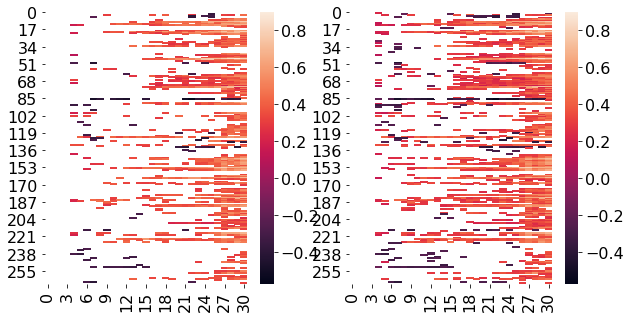

In [37]:
meanDiff_rand,meanDiff_rand_loosethr =  [np.empty((268,31)) for _ in range(2)]
meanDiff_rand[:],meanDiff_rand_loosethr[:] = [np.nan]*2
for n in range(268):
    pval_, meanDiff_ = pval_meandiff_soc_nonsoc_rand[n]
    meanDiff_rand[n,pval_<.05] = meanDiff_[pval_<.05]
    meanDiff_rand_loosethr[n,pval_<.1] = meanDiff_[pval_<.1]
plt.figure(1,figsize=(10,5))
plt.subplot(121)
sns.heatmap(meanDiff_rand)
plt.subplot(122)
sns.heatmap(meanDiff_rand_loosethr)


# get earliest pt of divergence RAND
# only timept criterion, not the end diff criterion

earliest_pt_rand,sign_earliest_pt_rand,earliest_pt_rand_loosethr,sign_earliest_pt_rand_loosethr = [np.empty((268,)) for i in range(4)]
earliest_pt_rand[:],sign_earliest_pt_rand[:],earliest_pt_rand_loosethr[:],sign_earliest_pt_rand_loosethr[:] = [np.nan]*4

movie_ind = 4

nodes = np.arange(0,268)# np.arange(10)           
for n in nodes:
    sig_timepts =  np.where(~np.isnan(meanDiff_rand[n,:]))[0]
    sig_timepts_loosethr =  np.where(~np.isnan(meanDiff_rand_loosethr[n,:]))[0]
    for t in sig_timepts:
        if t < 30:
            if (t+1) in sig_timepts: #(pval_auc<.05) and ( ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(meandiff_auc) == np.sign(meanDiff_rand[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                earliest_pt_rand[n]      = t #subtract by 3 in brainmaps!!
                sign_earliest_pt_rand[n] = np.sign(meanDiff_rand[n,t])
                break
    
    for t in sig_timepts_loosethr:
        if t < 30:
            if (t+1) in sig_timepts_loosethr: #(pval_auc<.05) and ( ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(meandiff_auc) == np.sign(meanDiff_rand[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                earliest_pt_rand_loosethr[n]      = t #subtract by 3 in brainmaps!!
                sign_earliest_pt_rand_loosethr[n] = np.sign(meanDiff_rand_loosethr[n,t])
                break


# end diff

end_diff_rand,sign_end_diff_rand = [np.empty((268,)) for _ in range(2)]
end_diff_rand[:],sign_end_diff_rand[:] = [np.nan]*2

movie_ind = 4
nodes = np.arange(0,268)# np.arange(10)
           
for n in nodes:
    sig_timepts =  np.where(~np.isnan(meanDiff_rand[n,:]))[0]

    if len(sig_timepts) > 2: # no pt doing this if there aren't at least 2 sig pts
        
        tcn1 = np.nanmean(tcs_run_z[responses[:,movie_ind]==1,n,-2:,movie_ind],axis=1)# subs * t:end (if it's the onset of a divergence, the auc later should be different between the groups)
        tcn2 = np.nanmean(tcs_run_z[responses[:,movie_ind]==0,n,-2:,movie_ind],axis=1)

        _,pval_end = stats.ttest_ind(tcn1,tcn2,nan_policy='omit',equal_var=False)
        meandiff_end = np.nanmean(tcn1)-np.nanmean(tcn2) 
        
        if pval_end < .05:
            end_diff_rand[n],sign_end_diff_rand[n] = 1,np.sign(meandiff_end)


In [ ]:
#  RAND
# plot timecourses with all timepts of divergences

ncols = 6
nrows= int(np.ceil(268/ncols))
#fig, axes = plt.subplots(67,4, figsize=(15,150))
xwidth = 20
yheight = 100# .75*nrows*xwidth/ncols
fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize = (xwidth,yheight))
fig.set_figwidth(xwidth)
fig.set_figheight(yheight)

x_ticks = np.round(np.linspace(0,30,4),2)  
ymin,ymax = -.5,2
lbls = [str(i-tr0_ind) for i in x_ticks]
movie_ind = 4
for n in range(268):
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    r = int(np.floor(n/ncols))
    c = int(np.floor(n%ncols))
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    ax[r,c].errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    ax[r,c].vlines(tr0_ind,ymin,ymax,color='grey')
    ax[r,c].hlines(0,0,31,color='grey')
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")

    sig = np.where(~np.isnan(meanDiff_rand_loosethr[n,:]))[0]
    ax[r,c].plot(sig,np.repeat(1,len(sig)),color = 'grey',ls = 'None',marker = 'o',label ="p<.05unc.")
    ax[r,c].plot(earliest_pt_rand_loosethr[n],1.2,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")

    if end_diff_rand[n] == 1:
        ax[r,c].plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
    ax[r,c].set_title(f'Node {n+1}')
    if n == 5:
        ax[r,c].legend(bbox_to_anchor=[1.05,1])
    #ax[r,c].vlines(earliest_pt_all[n],ymin,ymax,color = 'k')
    ax[r,c].set_xticks(x_ticks)
    ax[r,c].set_xticklabels(lbls)

ax[r,c+1].axis('off')
ax[r,c+2].axis('off')

plt.tight_layout()

p#lt.savefig(os.path.join(fig_save_loc,'rand_timecourses.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

#plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))
#plt.tight_layout()


# plot figures - all movies

## brainmap

In [38]:
earliest_pt_all_corrected = earliest_pt_all - tr0_ind
earliest_pt_rand_corrected = earliest_pt_rand - tr0_ind


In [39]:
fig_save_loc = os.path.join('/Users/f0053cz/Dropbox (Dartmouth College)/postdoc_Dartmouth/HCP/paper_prep/figures/fig5_timecourse/')

In [41]:

#import plotting functions

from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import plot_glass_brain
import nibabel as nib
from nilearn.plotting import plot_stat_map

mask = Brain_Data('https://neurovault.org/media/images/8423/shen_2mm_268_parcellation.nii.gz')
mask_x = expand_mask(mask)

cols = ['k','k','g']
lw = [3,2,1]

shen268_lbl = pd.read_csv(os.path.join(data_file_loc,"shen_dictionary.csv"))
#shen268_lbl

lbl = [str.upper(x[0:4]) for x in vidnames]
#lbl

In [47]:
import nilearn
nilearn.__version__

# for comparison with the other main figure if needed
nodes_coaxbill_rand_all = np.load(os.path.join(data_file_loc,'nodes_coaxbill_rand_all.npy')) # sig nodes hihglighted in the first S>NS GLM
len(np.where(nodes_coaxbill_rand_all)[0])

74

In [42]:
def color_rois(values):
    """
    This function assumes you are passing a vector "values" with the same length as the number of nodes in the atlas.
    """
    shen268 = nib.load(os.path.join(data_file_loc,"shen_2mm_268_parcellation.nii.gz"))
    shen268_data = shen268.get_fdata()
    img = np.zeros(shen268_data.shape)
    #print(shen268_data.shape)
    for roi in range(len(values)):
        itemindex = np.where(shen268_data==roi+1) # find voxels in this node (add 1 to account for zero-indexing)
        #print(len(itemindex[0]))
        img[itemindex] = values[roi] # color them by the desired value 

    affine = shen268.affine
    img_nii = nib.Nifti1Image(img, affine)
    
    return img_nii


In [43]:
coords = [10*int(i) for i in np.linspace(-4,7,6)]

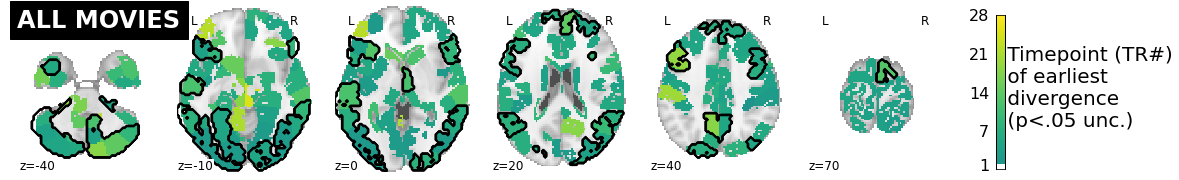

In [49]:
#plot earliest divergence point unsigned - ALL MOVIES
vmax  = 28
txt = ' Timepoint (TR#)\n of earliest\n divergence\n (p<.05 unc.)'
#txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
#fig=plt.figure(1,figsize=((10,3)))
nodes = np.zeros((268,))
nodes[end_diff_all==1] = earliest_pt_all_corrected[end_diff_all==1]
img = roi_to_brain(pd.Series(nodes), mask_x)

ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all) & (end_diff_all==1)),linewidths=1, colors=['k'],linestyles='solid')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
ax_plot._colorbar_ax.text(0.9,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


# RAND plots

In [50]:
earliest_pt_rand_corrected = earliest_pt_rand - tr0_ind
earliest_pt_rand_corrected_loosethr =  earliest_pt_rand_loosethr - tr0_ind


<Figure size 720x216 with 0 Axes>

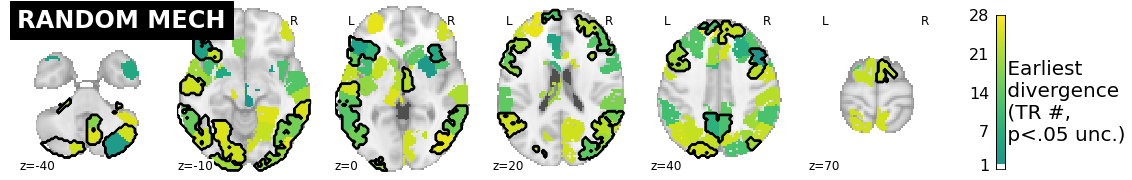

In [51]:
vmax=28
txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.)'
#txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
fig=plt.figure(1,figsize=((10,3)))
nodes = np.zeros((268,))
nodes[end_diff_rand==1] = earliest_pt_rand_corrected[end_diff_rand==1]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all) & (end_diff_rand==1)),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


## Plotting correlations



In [52]:
# correlation plots

def plot_fig(X,Y,xlabel,ylabel,xymin,xymax):
    inds = (~np.isnan(X)) & (~np.isnan(Y))
    X,Y = X[inds],Y[inds]
    plt.plot(X,Y,ls='None',marker='.',alpha = .5,color='grey',label = 'Fig3 nodes, endpoints diverge',markersize=8)
    
    plt.xlabel(xlabel, fontsize=24)
    plt.ylabel(ylabel, fontsize=24)
   
    plt.xlim(xymin,xymax)
    plt.ylim(xymin,xymax)

    xpos = xymin+ .55*(xymax-xymin)
    ypos = xymin+ .8*(xymax-xymin)
    
    r,p = stats.spearmanr(X,Y,nan_policy='omit')
    ax.annotate(f'Spearman\nr = {r:.2f}\n(p = {p:.2e})', xy=(1.1, 0.1), xycoords='axes fraction', fontsize=24)
    #plt.text(xpos,ypos,f'Spearman\nr={r:.2f},\np={p:.1e}',fontsize=20)

    m, b = np.polyfit(X,Y, 1)
    print(np.poly1d([m,b]))
    xplot = np.linspace(xymin,xymax,10)
    plt.plot(xplot, m*xplot + b,ls='dashed',color = 'k',label = 'line of best fit')
    #plt.title(np.poly1d([m,b]))

    #plt.text(xymin,.7*xymax,f'sl.={m:.2f},\nint.={b:.2f}')
    plt.vlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
    plt.hlines(0,xymin,xymax,color = 'grey',ls = 'dashed',alpha = .4)
   

def plot_sig_nodes(X,Y,inds):
    #X = stats.zscore(X)
    #X = X/np.nanstd(X)
    #Y = stats.zscore(Y)
    #Y = Y/np.nanstd(Y)
    plt.plot(X[inds],Y[inds],ls='None',marker='+',
    mfc='k', mec='k',mew = 3, linewidth = 5,label = 'sig. across both axes',ms=12)
    #plt.plot(X[nodes_coaxbill_rand_all_fish],Y[nodes_coaxbill_rand_all_fish],ls='None',marker='D',
    #mfc='g', mec='g',label = 'sig. across all\ncomparisons',ms=10)


 
-0.3708 x + 21.16
 
-0.3109 x + 20.59


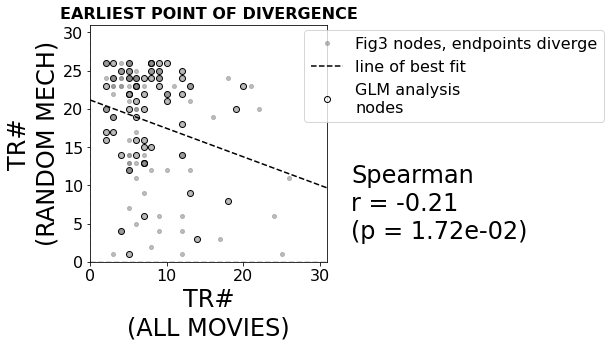

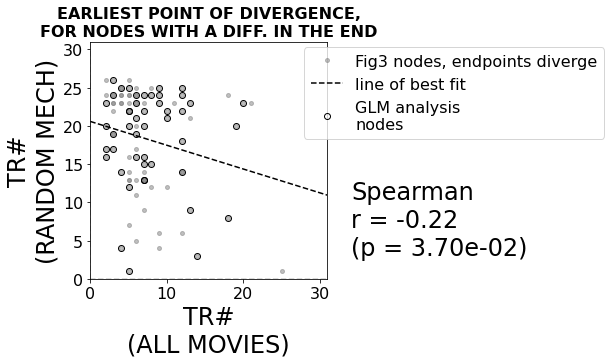

In [53]:
# ALL MOVIES vs. RANDOM MECH (don't need this since rand mech values are misleading)
# scatterplot
dims = [15,9.6]
fig= plt.figure(1,figsize = dims)

xymin,xymax = 0,31
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
X,Y = earliest_pt_all_corrected,earliest_pt_rand_corrected#_loosethr
plot_fig(X,Y,'TR#\n(ALL MOVIES)','TR#\n(RANDOM MECH)',xymin,xymax)
ax.set_aspect('equal')
#signodes
plt.plot(X[nodes_coaxbill_rand_all],Y[nodes_coaxbill_rand_all],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'GLM analysis\nnodes')
#plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
plt.title('EARLIEST POINT OF DIVERGENCE',fontweight='bold')
plt.legend(bbox_to_anchor = (2.2,1.01),fontsize =16)
plt.xlim(xymin,xymax)
plt.ylim(xymin,xymax)
#plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
#plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.savefig(os.path.join(fig_save_loc,'earliestpt_scatterplots.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

# scatterplot
dims = [15,9.6]
fig= plt.figure(2,figsize = dims)

xymin,xymax = 0,31
#plt.suptitle('Mean differences: "Social" - "Nonsocial"',fontweight='bold')
ax = fig.add_subplot(221)
X,Y = earliest_pt_all_corrected[((end_diff_all==1)&(end_diff_rand==1))],earliest_pt_rand_corrected[((end_diff_all==1)&(end_diff_rand==1))]
plot_fig(X,Y,'TR#\n(ALL MOVIES)','TR#\n(RANDOM MECH)',xymin,xymax)
plt.plot(earliest_pt_all_corrected[((end_diff_all==1)&(end_diff_rand==1))&(nodes_coaxbill_rand_all)],earliest_pt_rand_corrected[(end_diff_all==1)&(end_diff_rand==1) & (nodes_coaxbill_rand_all)],\
    mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'GLM analysis\nnodes')

ax.set_aspect('equal')
#signodes
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',markersize=6,ls='None',label = 'pairwise sig.')
#plot_sig_nodes(X,Y,common_nodes_soc_uns_nonsoc)
#plt.plot(X[nodes_all_SUNS_UNSNS],Y[nodes_all_SUNS_UNSNS],mec='k',marker='o',mfc='none',ls='None')
plt.title('EARLIEST POINT OF DIVERGENCE,\nFOR NODES WITH A DIFF. IN THE END',fontweight='bold')
plt.legend(bbox_to_anchor = (2.2,1.01),fontsize =16)
plt.xlim(xymin,xymax)
plt.ylim(xymin,xymax)
#plt.xticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
#plt.yticks([np.round(i,2) for i in np.linspace(-3,7,4)/10])
plt.savefig(os.path.join(fig_save_loc,'earliestpt_scatterplots_enddiff.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')




- for random mech, the timecourse divergence isn't too reliable - do better to not plot the RANDOM MECH figure

## Comparisons with RAND MECH

In [738]:
common_nodes = earliest_pt_all_corrected == earliest_pt_rand_corrected
print(len(np.where(common_nodes)[0]), ' nodes.')
for n in np.where(common_nodes)[0]:
    print(n, '. Divergence timept:',earliest_pt_all_corrected[n])
    rois = [eval(shen268_lbl[str(n+1)][0])['name']]# for n in np.where(common_nodes)[0]]
    print(n+1,rois)

# it's fine even if there's not many nodes here - could just be that rand has later changes

2  nodes.
86 . Divergence timept: 4.0
87 ['49.82% Right_Lateral_Ventricle; 19.78% Precuneous_Cortex; 17.22% Lingual_Gyrus; 11.72% Intracalcarine_Cortex']
150 . Divergence timept: 4.0
151 ['51.03% Frontal_Orbital_Cortex; 25.77% Inferior_Frontal_Gyrus_pars_triangularis; 11.73% Frontal_Pole; 8.38% Frontal_Operculum_Cortex']


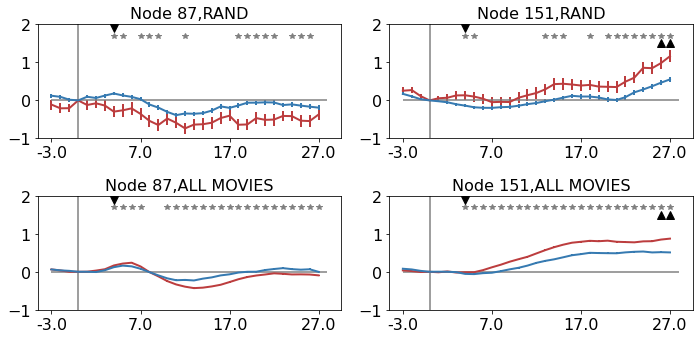

In [762]:
plt.figure(1,figsize=(10,5))
for i,n in enumerate(np.where(common_nodes)[0]):
    plt.subplot(2,2,i+1)
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    
    
    plt.ylim(-1,2)
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.title(f'Node {n+1},RAND')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    plt.xticks(x_ticks,lbls)

    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    plt.subplot(2,2,2+i+1)
    
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range


plt.tight_layout()

In [765]:
odd_nodes = np.where(earliest_pt_rand_corrected -earliest_pt_all_corrected >=10)[0]
len(odd_nodes)

83

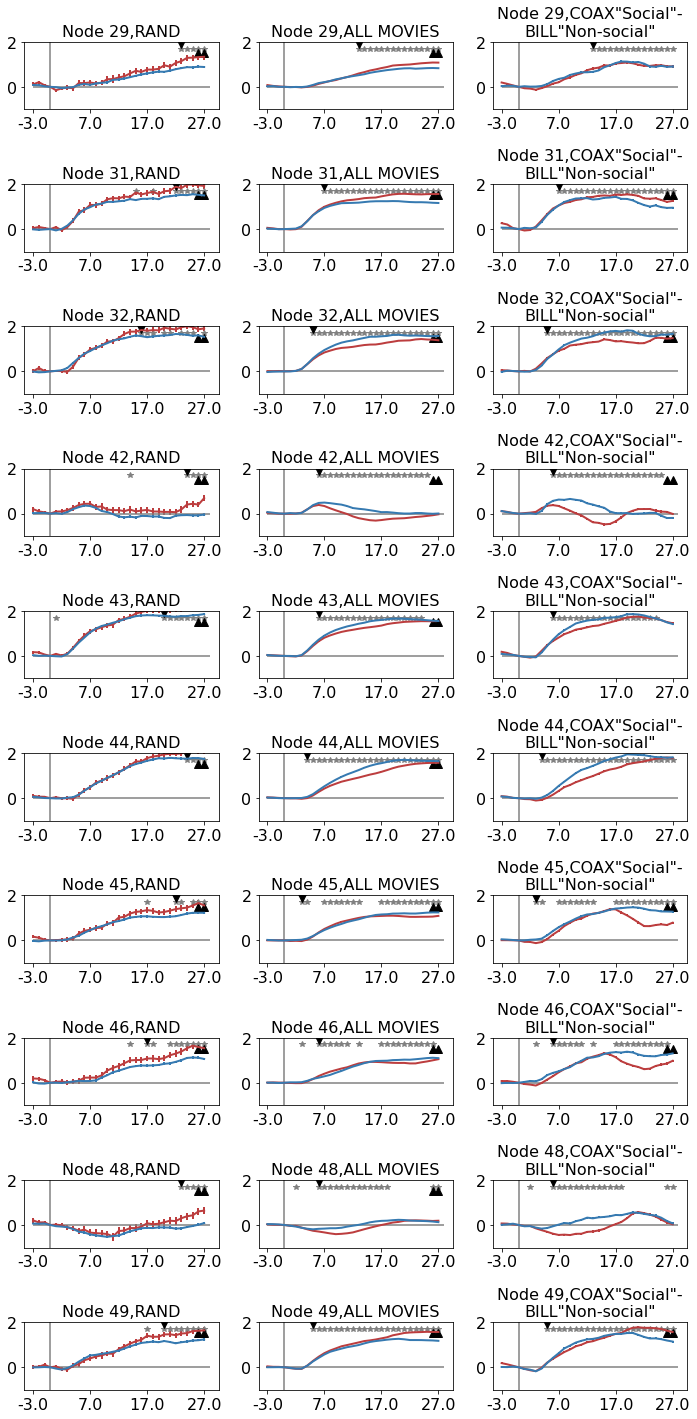

In [922]:
plt.figure(1,figsize=(10,20))
for i,n in enumerate(odd_nodes[10:20]):
    plt.subplot(10,3,i*3+1)
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    
    
    plt.ylim(-1,2)
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.title(f'Node {n+1},RAND')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    plt.xticks(x_ticks,lbls)

    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    plt.subplot(10,3,i*3+2)
    
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    
    plt.subplot(10,3,i*3+3)
    
    movieTC_yes = tcs_trial_z[subs,n,:,0] # nsubs * ntimepts
    movieTC_no  = tcs_trial_z[subs,n,:,1] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},COAX"Social"-\nBILL"Non-social"')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_coaxbill[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range


plt.tight_layout()

In [ ]:
plt.figure(1,figsize=(10,5))
for i,n in enumerate(np.where(odd_nodes)[0]):
    plt.subplot(2,2,i+1)
    movieTC_yes = tcs_run_z[responses[:,movie_ind]==1,n,:,movie_ind] # nsubs * ntimepts
    movieTC_no  = tcs_run_z[responses[:,movie_ind]==0,n,:,movie_ind] # nsubs * ntimepts
    sig = np.where(~np.isnan(meanDiff_rand[n,:]))[0]    
    
    plt.ylim(-1,2)
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.title(f'Node {n+1},RAND')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    plt.xticks(x_ticks,lbls)

    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_rand[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range

    plt.subplot(2,2,2+i+1)
    
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1},ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_rand[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range


plt.tight_layout()

In [728]:
print('All movies:',len(np.where(~np.isnan(earliest_pt_all_corrected))[0]))
print('RANDOM MECH:',len(np.where(~np.isnan(earliest_pt_rand_corrected))[0]))

print('All movies:',len(np.where(~np.isnan(earliest_pt_all_corrected[end_diff_all==1]))[0]))
print('RANDOM MECH:',len(np.where(~np.isnan(earliest_pt_rand_corrected[end_diff_rand==1]))[0]))

All movies: 249
RANDOM MECH: 139
All movies: 203
RANDOM MECH: 117


ALL MOVIES: 66
RAND: 53


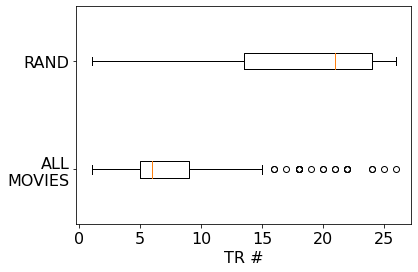

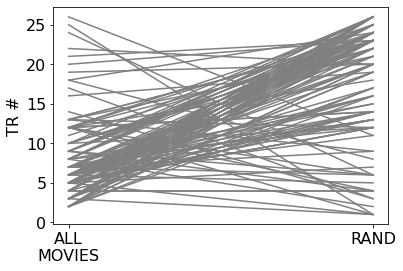

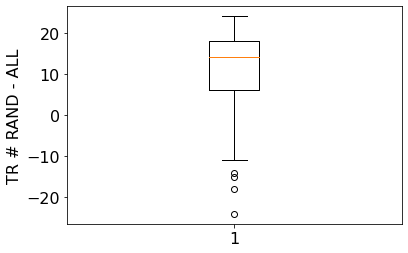

In [56]:
plt.figure(1)
plt.boxplot(earliest_pt_all_corrected[~np.isnan(earliest_pt_all_corrected)],positions=[1],vert=False)
plt.boxplot(earliest_pt_rand_corrected[~np.isnan(earliest_pt_rand_corrected)],positions=[2],vert=False)
plt.yticks(np.arange(1,3),['ALL\nMOVIES','RAND'])
plt.xlabel('TR #')

plt.figure(2)
both = np.array([earliest_pt_all_corrected,earliest_pt_rand_corrected])
plt.plot(range(2),both,color = 'grey')
plt.xticks(range(2),['ALL\nMOVIES','RAND'])
plt.ylabel('TR #')

plt.figure(3)
diff_both = both[1,:] - both[0,:]
plt.boxplot(diff_both[~np.isnan(diff_both)])
plt.ylabel('TR # RAND - ALL')

print('ALL MOVIES:',len(np.where((nodes_coaxbill_rand_all) & (end_diff_all==1))[0]))
print('RAND:',len(np.where((nodes_coaxbill_rand_all) & (end_diff_rand==1))[0]))

### Node timecourses which show a significance byt aren't different in the end (which are the nodes we lose with the end criterion?)

In [ ]:
nodes = np.where(~np.isnan(earliest_pt_all_corrected) & (end_diff_all!=1))[0] 
len(nodes)

# plot all movie nodes that are los because of no difference in the end
plt.figure(1,figsize=(20,20))

for i,n in enumerate(nodes):
    plt.subplot(8,6,i+1)
    movieTC_yes = tcs_run_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_run_resh_no[:,n,:] # nsubs * ntimepts
    plt.ylim(-1,2)
    
    sig = np.where(~np.isnan(coefs_all[n,:]))[0]    
    
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_yes,axis=0),stats.sem(movieTC_yes,axis=0,nan_policy='omit'),color = red_rgb,linewidth=2,label ='"Social"')
    plt.errorbar(range(movieTC_yes.shape[1]),np.nanmean(movieTC_no,axis=0),stats.sem(movieTC_no,axis=0,nan_policy='omit'),color = blue_rgb,linewidth=2,label ='Non-social"')
    plt.vlines(tr0_ind,-1,2,color='grey')
    plt.hlines(0,0,31,color='grey')
    
    plt.title(f'Node {n+1}')#,ALL MOVIES')
    plt.xticks(x_ticks,lbls)
    plt.plot(sig,np.repeat(1.7,len(sig)),color = 'grey',ls = 'None',marker = '*',label ="p<.05unc.")
    plt.plot(earliest_pt_all[n],1.9,color = 'k',ls = 'None',marker = 'v',mfc='k',markersize = 8,label = "earliest p<.05unc.")
    if end_diff_all[n] == 1:
        plt.plot([29,30],[1.5,1.5],color = 'k',ls = 'None',marker = '^',mfc='k',markersize=8,label ='end-pts. p<.05unc.') # earliest_pt still in the 3-31 range
    
plt.tight_layout()


# extra code

In [ ]:
# SIGNED (TO BE UPDATED!)

## ALL MOVIES

#plot earliest divergence point signed

#nodes = np.zeros((268,))
#nodes[nodes_rand_SUNS_UNSNS_unc] = meanDiff_sl_rand_S_UNS[nodes_rand_SUNS_UNSNS_unc]
#img = roi_to_brain(pd.Series(nodes), mask_x)
#img = roi_to_brain(pd.Series(meanDiff_sl_rand_S_UNS), mask_x)
txt = ' Earliest divergence\n (TR #)\n '
txt1 = ' "Social">"Non-social" '
txt2 = ' "Social"<"Non-social" '

vmin,vmax = np.nanmin(earliest_pt_all_corrected),np.nanmax(earliest_pt_all_corrected)
fig=plt.figure(1,figsize=((10,3)))
img = roi_to_brain(pd.Series(earliest_pt_all_corrected * sign_earliest_pt_all), mask_x)

'''glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = cmap,colorbar = True,vmin=vmin,vmax=vmax)
glassb.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')'''


img = roi_to_brain(pd.Series(earliest_pt_all_corrected * sign_earliest_pt_all), mask_x)
fig=plt.figure(2,figsize=((10,3)))
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()

plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_signed.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

plt.figure(3,figsize = (8,3))
nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = earliest_pt_all_corrected[nodes_coaxbill_rand_all] * sign_earliest_pt_all[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()

#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_signed_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')



# ALL MOVIES


#plot earliest divergence point signed


txt = ' Earliest divergence\n (TR #)\n '
txt1 = ' "Social">"Non-social" '
txt2 = ' "Social"<"Non-social" '

vmin,vmax = np.nanmin(earliest_pt_rand_corrected),np.nanmax(earliest_pt_rand_corrected)
fig=plt.figure(1,figsize=((10,3)))
img = roi_to_brain(pd.Series(earliest_pt_rand_corrected*sign_earliest_pt_rand), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = True,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = cmap,colorbar = True,vmin=vmin,vmax=vmax)
glassb.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
glassb._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

fig=plt.figure(2,figsize=((10,3)))
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = cmap,colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.text(0.9,0,txt,fontsize=20,fontdict = {'verticalalignment':'center','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,-26,txt2,fontsize=20,fontdict = {'verticalalignment':'bottom','rotation':0})#get_legend()
ax_plot._colorbar_ax.text(0.9,26,txt1,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_signed.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')


plt.figure(3,figsize = (10,3))
nodes = np.zeros((268,))
nodes[nodes_coaxbill_rand_all] = earliest_pt_rand_corrected[nodes_coaxbill_rand_all] * sign_earliest_pt_rand[nodes_coaxbill_rand_all]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = cmap,colorbar=True,annotate=True)
#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'rand/earliestpt_signed_axial.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')


In [ ]:
# Visualize all social-random differences in a single plot

#all MOVIES
plot_fig =1
plt.figure(1,figsize = (15,10))
nodes = np.arange(0,268)# np.arange(10)
plt.subplot(2,2,1)
# plot indiv diffs for each node in black
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_trial_z[:,n,:,movie_ind_yes] # nsubs * ntimepts
    movieTC_no = tcs_trial_z[:,n,:,movie_ind_no] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes-movieTC_no,axis=0),
                 color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes-movieTC_no,axis=0),
                 color = 'k', alpha = .1)
    #t_array = tmt.ttest_diffmovies(movieTC_yes, movieTC_no,plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

#plot mean difference in magenta
diff = tcs_trial_z[:,:,:,movie_ind_yes] - tcs_trial_z[:,:,:,movie_ind_no]  # nnodes*nsubs * ntimepts
diff = np.array([np.ndarray.flatten(diff[:,:,i]) for i in range(diff.shape[2])]).T # collapsing subs and nodes
plt.errorbar(np.arange(diff.shape[1]),np.nanmedian(diff,axis=0),
         stats.sem(diff,axis=0,nan_policy='omit'),marker = '.',
             ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('COAX vs BILL, same subs')
plt.legend()

# SAME MOVIE
plt.subplot(2,2,2)
nodes = np.arange(0,268)# np.arange(10)
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_run_z[subs1,n,:,movie_ind_same] # nsubs * ntimepts
    movieTC_no = tcs_run_z[subs2,n,:,movie_ind_same] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1)
    
    #t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no, plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

diff = np.nanmedian(tcs_run_z[subs1,:,:,movie_ind_same],axis=(0,1)) - \
        np.nanmedian(tcs_run_z[subs2,:,:,movie_ind_same],axis=(0,1))
plt.plot(np.arange(diff.shape[0]),diff,  marker = '.',ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('RAND, diff subs')
plt.legend()

# ALL MOVIES
plt.subplot(2,2,3)
nodes = np.arange(0,268)# np.arange(10)
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_trial_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no = tcs_trial_resh_no[:,n,:] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no, axis=0),
             color = 'k', alpha = .1)
    
    #t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no, plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

diff = np.nanmedian(tcs_trial_resh_yes,axis=(0,1)) - np.nanmedian(tcs_trial_resh_no,axis=(0,1))
plt.plot(np.arange(diff.shape[0]),diff,  marker = '.',ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('all movies, mixed subs')
plt.legend()

#ALL MOVIES, MATCHED
plt.subplot(2,2,4)
nodes = np.arange(0,268)# np.arange(10)
for i_nodes,n in enumerate(nodes):
    movieTC_yes = tcs_trial_resh_yes_matched[:,n,:] # nsubs * ntimepts
    movieTC_no = tcs_trial_resh_no_matched[:,n,:] # nsubs * ntimepts
    if i_nodes ==0:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1, label = 'nodewise yes-no')
    else:
        plt.plot(np.arange(movieTC_yes.shape[1]),np.nanmedian(movieTC_yes,axis=0)-np.nanmedian(movieTC_no,axis=0),
             color = 'k', alpha = .1)
    
    #t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no, plot_fig, 'difference',1,tr0_ind) # values in [0,28]

plt.ylim(-2,2)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])

diff = np.nanmedian(tcs_trial_resh_yes_matched,axis=(0,1)) - np.nanmedian(tcs_trial_resh_no_matched, axis=(0,1))
plt.plot(np.arange(diff.shape[0]),diff,  marker = '.',ls = 'None',color = 'magenta', label = 'median,sem')
plt.hlines(0,0,32,color = 'b')
plt.title('all movies,matched subs (n=348)')
plt.legend()


# visualizing earliest divergence points from the t-test
# coaxing - billiards
plt.figure(1,figsize = (16,12))
plt.subplot(1,2,1)
sns.heatmap(np.nanmedian(tcs_trial_z[:,:,:,movie_ind_yes] - tcs_trial_z[:,:,:,movie_ind_no],axis=0),center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tcs_trial_z.shape[0],color = 'w')
plt.plot(earliest_pt_diff+tr0_ind,np.arange(268)+.5,color ='white', marker = 'o', ls = 'None')
plt.title('Social(COAX)-Random(BILL)')
#plt.ylim(0,2)

# randyes - randno
plt.subplot(1,2,2)
sns.heatmap(np.nanmedian(tcs_run_z[subs1,:,:,movie_ind_same],axis=0) - 
            np.nanmedian(tcs_run_z[subs2,:,:,movie_ind_same],axis=0),center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tcs_trial_z.shape[0],color = 'w')
plt.plot(earliest_pt_same+tr0_ind,np.arange(268)+.5,color ='white', marker = 'o', ls = 'None')

plt.title('Social(RAND)-Random(RAND)')
#plt.ylim(0,2)

# TO DO: double-check the white dots

# coaxing, billiards separately

plt.figure(1,figsize = (10,5))
mean_diff_all = np.zeros((268,32))
for n in range(268):
    inds = ts[n][0]
    mean_diff_ = np.nanmedian(tc_all[:,n,:,movie_ind_yes],axis=0)
    for i in np.arange(3,len(mean_diff_)):
        if i-3 not in inds:
            mean_diff_[i] = 0
    mean_diff_all[n,:] = mean_diff_
plt.subplot(1,2,1)    
sns.heatmap(mean_diff_all,center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tc_all.shape[0],color = 'w')
plt.title('Social')


mean_diff_all = np.zeros((268,32))
for n in range(268):
    inds = ts[n][0]
    mean_diff_ = np.nanmedian(tc_all[:,n,:,movie_ind_no],axis=0)
    for i in np.arange(3,len(mean_diff_)):
        if i-3 not in inds:
            mean_diff_[i] = 0
    mean_diff_all[n,:] = mean_diff_
plt.subplot(1,2,2)             
sns.heatmap(mean_diff_all,center = 0)
plt.xticks(np.arange(0,32,6),[str(i) for i in np.arange(0,32,6)-tr0_ind])
plt.vlines(3,0,tc_all.shape[0],color = 'w')
plt.title('Random')
plt.tight_layout()


# not plotting the heatmaps for the same movie for now - can do so if necessary later.

to illustrate indiv data points, plotted in fig 1 are 5 exeplar subjects and the mean of ALL the subs


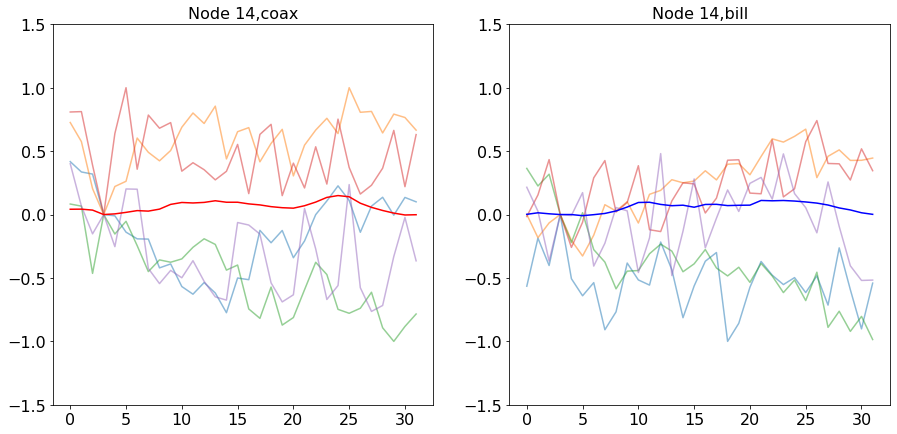

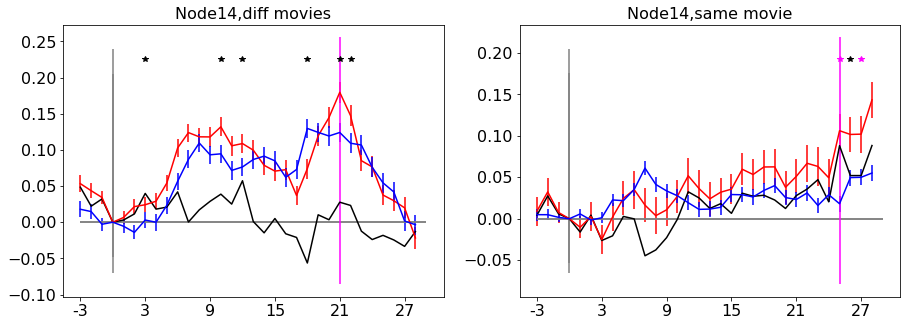

In [34]:
# test ttests function with MAXMIN normalized data


node_inds = [14]# change node inds here
print('to illustrate indiv data points, plotted in fig 1 are 5 exeplar subjects and the mean of ALL the subs')

plt.figure(1,figsize = (15,7))
plt.subplot(1,2,1)
plt.title(f'Node {node_inds[0]},coax')
plt.plot(tcs_trial_maxmin[:5,node_inds[0],:,movie_ind_yes].T, alpha = 0.5)
plt.plot(np.nanmean(tcs_trial_maxmin[:,node_inds[0],:,movie_ind_yes],axis=0), alpha = 1, color = 'red')
plt.ylim(-1.5,1.5)

plt.subplot(1,2,2)
plt.title(f'Node {node_inds[0]},bill')
plt.plot(tcs_trial_maxmin[:5,node_inds[0],:,movie_ind_no].T, alpha = 0.5)
plt.plot(np.nanmean(tcs_trial_maxmin[:,node_inds[0],:,movie_ind_no],axis=0), alpha = 1, color = 'blue')
plt.ylim(-1.5,1.5)


plot_fig = 1
if plot_fig:
    plt.figure(2,figsize = (15,5*len(node_inds)))

for ind,node_ind in enumerate(node_inds):
    #node_ind = 14

    plot_fig = 1
    if plot_fig:
        plt.subplot(len(node_inds),2,(ind*2+1))

    t_array = tmt.ttest_diffmovies(tcs_trial_maxmin[:,node_ind,:,movie_ind_yes], 
                               tcs_trial_maxmin[:,node_ind,:,movie_ind_no],
                                   plot_fig,'both',0,tr0_ind)
    t_array = tmt.ttest_diffmovies(tcs_trial_maxmin[:,node_ind,:,movie_ind_yes], 
                               tcs_trial_maxmin[:,node_ind,:,movie_ind_no],
                                   plot_fig,'diff',0,tr0_ind)
    #print(t_array)
    ear=[]
    if len(t_array)>0:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1:
                ear = [t_array[0][i], t_array[1][i]]
                break
    else:
        ear = np.nan
    #print(ear)
    
    ymin,ymax = plt.ylim()
    try:
        plt.vlines(ear[0]+tr0_ind,ymin,ymax, color = 'magenta')
    except: 
        print('no diff')

    plt.title(f'Node{node_ind},diff movies')


    # test above function same movie

    if plot_fig:
         plt.subplot(len(node_inds),2,(ind*2+2))

    t_array = tmt.ttest_samemovies(tcs_run_maxmin[subs1,node_ind,:,movie_ind_same], 
                               tcs_run_maxmin[subs2,node_ind,:,movie_ind_same],
                                   plot_fig,'both',0,tr0_ind)
    t_array = tmt.ttest_samemovies(tcs_run_maxmin[subs1,node_ind,:,movie_ind_same], 
                               tcs_run_maxmin[subs2,node_ind,:,movie_ind_same],
                                   plot_fig,'diff',0,tr0_ind)
    #print(t_array)
    ear=[]
    if len(t_array)>0:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1:
                ear = [t_array[0][i], t_array[1][i]]
                break
    else:
        ear = np.nan
    # print(ear)
    ymin,ymax = plt.ylim()
    try:
        plt.vlines(ear[0]+tr0_ind,ymin,ymax, color = 'magenta')
    except: 
        print('no diff')

    plt.title(f'Node{node_ind},same movie')




In [ ]:
# social - nonsocial differences for each node
# diff movies

if plot_fig == 1:
    ncols=6
    nrows = 45
    #nrows = int(np.ceil(len(sig_nodes)/ncols))

    xwidth = 18
    yheight = .55*nrows*xwidth/ncols
    fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = False, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)


nodes = np.arange(0,268)# np.arange(10)

for i_nodes,n in enumerate(nodes):
    if i_nodes % 50 ==0:
        print('node:',n)
    movieTC_yes = tcs_trial_z[:,n,:,movie_ind_yes] # nsubs * ntimepts
    movieTC_no = tcs_trial_z[:,n,:,movie_ind_no] # nsubs * ntimepts

    if plot_fig:
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.title('Node '+ str(n+1),fontweight = 'bold')

    t_array = tmt.ttest_diffmovies(movieTC_yes, movieTC_no, plot_fig, 'difference',tr0_ind) # values in [0,28]
    
if plot_fig:
    for i_nodes in np.arange(len(nodes),int(nrows*ncols)):
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.axis('off')

    plt.suptitle('Yes vs. No',fontweight='bold')
    fig.tight_layout(rect=[0, 0.02, 1, 0.98])
    moviename = f'timecourses_Yes_vs_No_movie{movie_ind_yes}_movie{movie_ind_no}.png'
    plt.savefig(os.path.join(data_file_loc,'figures',moviename))



In [ ]:
# social - nonsocial differences for each node
# same movie

if plot_fig == 1:
    ncols=6
    nrows = 45
    #nrows = int(np.ceil(len(sig_nodes)/ncols))

    xwidth = 18
    yheight = .55*nrows*xwidth/ncols
    fig, ax = plt.subplots(nrows, ncols, sharex = True, sharey = False, figsize = (xwidth,yheight))
    fig.set_figwidth(xwidth)
    fig.set_figheight(yheight)


nodes = np.arange(0,268)# np.arange(10)

for i_nodes,n in enumerate(nodes):
    if i_nodes % 50 ==0:
        print('node:',n)
    movieTC_yes = tcs_run_z[subs1,n,:,movie_ind_same] # nsubs * ntimepts
    movieTC_no = tcs_run_z[subs2,n,:,movie_ind_same] # nsubs * ntimepts

    if plot_fig:
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.title('Node '+ str(n+1),fontweight = 'bold')

    t_array = ttest_samemovies(movieTC_yes, movieTC_no, plot_fig, 'difference',0,tr0_ind) # values in [0,28]
    
if plot_fig:
    for i_nodes in np.arange(len(nodes),int(nrows*ncols)):
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.axis('off')

    plt.suptitle('Yes vs. No',fontweight='bold')
    fig.tight_layout(rect=[0, 0.02, 1, 0.98])
    moviename = f'timecourses_Yes_vs_No_movie{movie_ind_same}_movie{movie_ind_same}.png'
    plt.savefig(os.path.join(data_file_loc,'figures',moviename))




In [ ]:
'''from matplotlib.colors import ListedColormap, LinearSegmentedColormap
newcmp = ListedColormap(colors1,name='colors1')
top = cm.get_cmap('Oranges_r', 128)
bottom = cm.get_cmap('Blues', 128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))
newcolors'''
# exploring colors 
'''import matplotlib.cm as cm
colors1 = []
palette = 'viridis' # 'RdBu'
for i in range(len(cm.datad['hsv'])):
    c = matplotlib.cm.datad[palette][i]
    #c = [c[i]*255 for i in range(len(c))]
    colors1.append(c)

colors1.pop(5)
colors1_1 =colors1[:5]
colors1_2 = colors1[5:]
colors1_1.reverse()
colors1_2.reverse()
colors1 = colors1_1+colors1_2
colors1.reverse()
print(colors1)

cmap = LinearSegmentedColormap.from_list('colors_timepts', colors1, N=10)'''

In [ ]:
# plot of Yes vs. No timecourses and computing earliest timepoint at which difference first emerges
# all movies

import warnings
warnings.filterwarnings('ignore')
    
print('all MOVIES')
earliest_pt_all = np.empty((268,))
earliest_pt_all[:] = np.nan
sign_earliest_pt_all = np.empty_like(earliest_pt_all)
sign_earliest_pt_all[:] = np.nan

nodes = np.arange(0,268)# np.arange(10)
ts = [] # 268 elements
for i_nodes,n in enumerate(nodes):
    '''if i_nodes % 50 ==0:
        print('node:',n)
    movieTC_yes = tcs_trial_resh_yes[:,n,:] # nsubs * ntimepts
    movieTC_no  = tcs_trial_resh_no[:,n,:] # nsubs * ntimepts

    if plot_fig:
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.title('Node '+ str(n  +1),fontweight = 'bold')

    t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no,plot_fig,'both',
                                  0,tr0_ind) # returns sig timepts and their sign.
    # timept values in [0,28]
    ts.append(t_array)
    #print(t_array)'''
    
    
    if len(t_array[0])> 1:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1:
                earliest_pt_all[n]      = t_array[0][i]
                sign_earliest_pt_all[n] = t_array[1][i]
                break
                if abs(earliest_pt_same[n]) > 27:
                    print(t_array,t_array[0][i])

    if plot_fig:
        ymin,ymax = plt.ylim()
        plt.vlines(earliest_pt_all[n]+tr0_ind,ymin,ymax,color = 'magenta')
    
if plot_fig:
    for i_nodes in np.arange(len(nodes),int(nrows*ncols)):
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.axis('off')

    plt.suptitle('ALLsocial (red) vs. ALLnonsocial (blue); subjects matched',fontweight='bold')

    fig.tight_layout(rect=[0, 0.02, 1, 0.98])
    moviename = f'timecourses_Yes_vs_No_allmovies.png'
    plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))

np.save(os.path.join(data_file_loc,'earliest_pt_div_allmovies.npy'), ts)
print('saved')


In [ ]:
# testing the above plot function
(#in the plots below)
#- the timecourses themselves and peak separation don't look too similar between coax/bill (left), rand (second from left) and the all movies figures, but these ROIs were picked out randomly. Maybe the overall brainmap or meaningful ROIs will show some similarity..
#- third and fourth columns (across all movies) - with and without sub-selecting same subjects give similar results, so prob taking all subjects is fine (i.e., third column is probably fine in spite of the mixed subject pool) - but neither suffice for a formal analysis without further thought.. (removed 4th column now - planning to do an LME at each timept)

# import module consisting of ttests to compare timecourses
from importlib import reload  
import ttests_movie_tcs as tmt # contains  ttest_diffmovies, ttest_samemovies
reload(tmt) # reload if the module/.py file is changed


# test functions in the above modules

node_inds = [0,2,4]# change node inds here

plot_fig = 1
if plot_fig:
    plt.figure(1,figsize = (15,3*len(node_inds)))

for ind,node_ind in enumerate(node_inds):
    print(str(ind) + '.' + eval(shen268[str(node_ind+1)][0])['name'])

    if plot_fig:
        plt.subplot(len(node_inds),3,(ind*3+1))
    t_array = tmt.ttest_diffmovies(tcs_trial_z[:,node_ind,:,movie_ind_yes],
                                   tcs_trial_z[:,node_ind,:,movie_ind_no],
                                   plot_fig,'both',0,tr0_ind) # returns list of 2 arrays: indices with p<.05 and sign of yes-no difference
                                   # plot yes/no timecourses
    t_array = tmt.ttest_diffmovies(tcs_trial_z[:,node_ind,:,movie_ind_yes], 
                                   tcs_trial_z[:,node_ind,:,movie_ind_no],
                                   plot_fig,'diff',0,tr0_ind) # plot difference
    #print(t_array)
    ear=[]
    if len(t_array)>0:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1: #first index which is also followed by a significantly divergent timept
                ear = [t_array[0][i], t_array[1][i]]
                break
    else:
        ear = np.nan
    #print(ear)
    ymin,ymax = plt.ylim()
    try:
        plt.vlines(ear[0]+tr0_ind,ymin,ymax, color = 'magenta')
    except: 
        print('no diff')

    plt.title(f'Node{node_ind},diff movies', color = 'w')

    # test above function same movie

    if plot_fig:
         plt.subplot(len(node_inds),3,(ind*3+2))
    t_array = tmt.ttest_samemovies(tcs_run_z[subs1,node_ind,:,movie_ind_same], 
                               tcs_run_z[subs2,node_ind,:,movie_ind_same],
                                   plot_fig,'both',0,tr0_ind) # plot yes/no timecourses
    t_array = tmt.ttest_samemovies(tcs_run_z[subs1,node_ind,:,movie_ind_same], 
                               tcs_run_z[subs2,node_ind,:,movie_ind_same],
                                   plot_fig,'diff',0,tr0_ind) # plot difference
    #print(t_array)
    ear=[]
    if len(t_array)>0:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1:
                ear = [t_array[0][i], t_array[1][i]]
                break
    else:
        ear = np.nan
    # print(ear)
    
    ymin,ymax = plt.ylim()
    try:
        plt.vlines(ear[0]+tr0_ind,ymin,ymax, color = 'magenta')
    except: 
        print('no diff')
    plt.title(f'Node{node_ind},same movie', color = 'w')

    # test above function across all movies

    if plot_fig:
         plt.subplot(len(node_inds),3,(ind*3+3))
         
    
    t_array = tmt.ttest_samemovies(tcs_trial_resh_yes[:,node_ind,:], 
                               tcs_trial_resh_no[:,node_ind,:],
                                   plot_fig,'both',0,tr0_ind) # plot yes/no timecourses
    t_array = tmt.ttest_samemovies(tcs_trial_resh_yes[:,node_ind,:], 
                               tcs_trial_resh_no[:,node_ind,:],
                                   plot_fig,'diff',0,tr0_ind) # plot difference
    #TO DO: HAVE TO CONSIDER SHARE VARIANCE FOR A FORMAL ANALYSIS
    # THERE'S SOME SHARED VARIANCE, BUT THE GROUPS ARE NEITHER FULLY INDEPENDENT NOR FULLY DEPENDENT
    ear=[]
    if len(t_array)>0:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1:
                ear = [t_array[0][i], t_array[1][i]]
                break
    else:
        ear = np.nan
    # print(ear)
    
    ymin,ymax = plt.ylim()
    try:
        plt.vlines(ear[0]+tr0_ind,ymin,ymax, color = 'magenta')
    except: 
        print('no diff')

    plt.title(f'Node{node_ind}, all movies', color = 'w')

    '''if plot_fig:
         plt.subplot(len(node_inds),4,(ind*4+4))
         
    t_array = tmt.ttest_diffmovies(tcs_trial_resh_yes_matched[:,node_ind,:], 
                               tcs_trial_resh_no_matched[:,node_ind,:],
                                   plot_fig,'both',0,tr0_ind) # plot yes/no timecourses
    #t_array = tmt.ttest_diffmovies(tcs_trial_resh_yes_matched[:,node_ind,:], 
    #                           tcs_trial_resh_no_matched[:,node_ind,:],
    #                              plot_fig,'diff',0,tr0_ind) # plot difference
    #TO DO: HAVE TO CONSIDER SHARE VARIANCE FOR A FORMAL ANALYSIS
    # THERE'S SOME SHARED VARIANCE, BUT THE GROUPS ARE NEITHER FULLY INDEPENDENT NOR FULLY DEPENDENT
    ear=[]
    if len(t_array)>0:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1:
                ear = [t_array[0][i], t_array[1][i]]
                break
    else:
        ear = np.nan
    # print(ear)
    
    ymin,ymax = plt.ylim()
    try:
        plt.vlines(ear[0]+tr0_ind,ymin,ymax, color = 'magenta')
    except: 
        print('no diff')

    plt.title(f'Node{node_ind}, all movies matched', color = 'w')'''

plt.tight_layout()



In [ ]:
# plot of Yes vs. No timecourses and computing earliest timepoint at which difference first emerges
# Same movie

nodes = np.arange(0,268)# np.arange(10)  
for i_nodes,n in enumerate(nodes):
    if i_nodes % 50 ==0:
        print('node:',n)
    movieTC_yes = tcs_run_z[subs1,n,:,movie_ind_same] # nsubs * ntimepts
    movieTC_no = tcs_run_z[subs2,n,:,movie_ind_same] # nsubs * ntimepts

    if plot_fig:
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.title('Node '+ str(n+1),fontweight = 'bold')

    t_array = tmt.ttest_samemovies(movieTC_yes, movieTC_no,plot_fig,'both',
                                  0,tr0_ind) # returns sig timepts and their sign.
    # timept values in [0,28]
    ts.append(t_array)
    #print(t_array)
    
    
    if len(t_array[0])> 1:
        for i in range(len(t_array[0])-1):
            if t_array[0][i+1] - t_array[0][i] == 1:
                earliest_pt_same[n]      = t_array[0][i]
                sign_earliest_pt_same[n] = t_array[1][i]
                break
                if abs(earliest_pt_same[n]) > 27:
                    print(t_array,t_array[0][i])

    if plot_fig:
        ymin,ymax = plt.ylim()
        plt.vlines(earliest_pt_same[n]+tr0_ind,ymin,ymax,color = 'magenta')
    
if plot_fig:
    for i_nodes in np.arange(len(nodes),int(nrows*ncols)):
        plt.subplot(nrows,ncols,i_nodes+1)
        plt.axis('off')

    plt.suptitle('RANDsocial(red) vs. RANDnonsocial (blue)',fontweight='bold')

    fig.tight_layout(rect=[0, 0.02, 1, 0.98])
    moviename = f'timecourses_Yes_vs_No_movie{str.upper(vidnames[movie_ind_same][:4])}_movie{str.upper(vidnames[movie_ind_same][:4])}.png'
    plt.savefig(os.path.join(data_file_loc,'figures','timecourses',moviename))

np.save(os.path.join(data_file_loc,'earliest_pt_div_RAND.npy'), ts)
print('saved')


In [ ]:
# messy version of the fn to do timewise LME

# in theory we can combine htis and the later code snippet with AUC - but it's nice to have this funtction like this so we can visualize all sig nodes!! (same for rand and coax-bill too)
def lme_across_time(tcs_run_z_node):
    # takes a nodes' timecourse (input dims: subjects * timepts * movies) and performs and LME on the Social vs. Non-social responses across all movies
    # returns a list of [reg coefft, pvalue] - each list elemnet has a length of 31 (i.e., same as tcs_runs_z.shapep[2])
    # in the output, timepts at which the LME did not converge are assigned an np.nan, others have respective values
    # 
    #  
    coef_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    coef_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   

    rows = []
    for m in range(10):
        rows.append(np.arange(m*nsubs,(m+1)*nsubs))

    #df = pd.DataFrame(columns = ['BOLD','response','subID','movie'])    # create an empty dataframe
    bold = np.empty((len(subs_10resp),))
            
    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        #print('timept:',timept)
        if timept == tr0_ind:
            #mat = np.empty((len(subs_10resp)*10,4))
            #mat[:] = np.nan
            bold, subID, movie = [np.empty((nsubs*10,)) for _ in range(3)]
            bold[:], subID[:], movie[:] = [np.nan]*3
            responses_txt_col = []
            #mat[:] = np.nan
            for m in range(10):
                #mat[rows[m],:] = np.column_stack((tcs_run_z_node[subs_10resp, timept, m],responses[subs_10resp,m],subs_10resp,np.repeat(m,len(subs_10resp))))
                #mat[rows[m],:] = np.column_stack((tcs_run_z_node[subs_10resp, timept, m],responses_txt[m][subs_10resp],subs_10resp,np.repeat(m,len(subs_10resp))))
                bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
                subID[rows[m]] = np.where(subs_10resp)[0]
                movie[rows[m]] = np.repeat(m,nsubs)
                responses_txt_col.extend(np.array(responses_txt[m])[subs_10resp])
                
            #df = pd.DataFrame(mat,columns = ['BOLD','response','subID','movie'])
            df = pd.DataFrame({'BOLD':bold,'response':responses_txt_col,'subID':subID,'movie':movie})
            
            #print('timept10:',df.shape)
        else:
            bold[:] = np.nan
            for m in range(10):
                bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
            df.loc[:,'BOLD'] = bold
        
        #df1 = df.loc[df['response']!= 9,:] # yes v no, all movies
        df1 = df.loc[df['response']!= 'Neither',:] # yes v no, all movies, remove all other resposnes
        #df1['response'] = df1['response'].map({1.0: "Social", 0.0:  "Nonsocial"})
        
        #if timept ==8:
            #print(df1)
        try:
            model = Lmer('BOLD ~  response +(1|subID)', data=df1) # ff: mean response, rf:subjID
            #if timept ==8:
            #    print('before fit',model.warnings)
            #if timept ==8:
            #    print(model.fit(factors={"response":["Nonsocial","Social"]},summary = True, verbose = True))
            #else:
            model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)
            #if timept ==8:
            #    print('after fit',model.warnings)
            
            if len(model.warnings) == 0: # model did converge -> save coefs
                #print('no warning')
                coef_soc_nonsoc[timept] = model.coefs['Estimate'][1]
                pval_soc_nonsoc[timept] = model.coefs['P-val'][1]
            else: # don't save coefs if there were warnings
                print(model.warnings)
        
        except:
            coef_soc_nonsoc[timept] = np.nan
            pval_soc_nonsoc[timept] = np.nan
            
    return coef_soc_nonsoc,pval_soc_nonsoc

In [ ]:


''' # Selecting only subjects who gave popular responses. This one makes more sense when doing a t-test so the two groups are at least eqally weighted subject-wise. 
# Still not entirely correct, LME is better
pop_responses = [1,0,0,1,0,1,1,0,1,0]
subsList = []
for s in range(responses.shape[0]):
    if list(responses[s,:]) == pop_responses:
        subsList.append(s)
print('num subs showing pop responses:', len(subsList))

#### PAN-MOVIES ANALYSIS MATCHED
#select subs who responded "social" to the yes movie and nonsocial to the no movie

print('\ntrial-wise norm data.')
fileName = os.path.join(data_file_loc,'timecourses_trial_norm','timecourse-all-movies_zscorenorm.npy')

print('before:',tcs_trial_all_z.shape)

tcs_trial_resh_yes_matched = []
tcs_trial_resh_no_matched = []


for m in range(10):
    if pop_responses[m] == 1:
        tcs_trial_resh_yes_matched.append(tcs_trial_all_z[subsList,:,:,m])# subsList * 268 * 32
    elif pop_responses[m] == 0:
        tcs_trial_resh_no_matched.append(tcs_trial_all_z[subsList,:,:,m])# subsList * 268 * 32

tcs_trial_resh_yes_matched = np.concatenate(tcs_trial_resh_yes_matched,axis=0)
tcs_trial_resh_no_matched  = np.concatenate(tcs_trial_resh_no_matched,axis=0)
print('Across movies: \n\tyes:'+ str(tcs_trial_resh_yes_matched.shape) + ',no:' + str(tcs_trial_resh_no_matched.shape))

## caution: this is still not fully matched - just that both groups have the same subjects so we know the variance is shared.
#  Each subject is repeated within a group too.
# to do: is there a better way to do this? guess this can be compared to the block analysis of multiple stimuli'''

In [ ]:
# get earliest pt of divergenceALL MOVIES - v1. only criterion is the two consistent pt at the earliest div pt

earliest_pt_all = np.empty((268,))
earliest_pt_all[:] = np.nan
sign_earliest_pt_all = np.empty_like(earliest_pt_all)
sign_earliest_pt_all[:] = np.nan

nodes = np.arange(0,268)# np.arange(10)

strings = ["" for i in range(3)]
responses_1d = ['Social'] * tcs_run_resh_yes.shape[0] + ['Nonsocial'] * tcs_run_resh_no.shape[0]

sub_ind = subs_resh_yes+subs_resh_no
           
for n in nodes:
        sig_timepts =  np.where(~np.isnan(coefs_all[n,:]))[0]

        for t in sig_timepts:
        #t = np.where(~np.isnan(coefs_all[n,:]))[0][0]
            
            if t < 30:
                if ((t+1) in sig_timepts):# and (30 in sig_timepts): # only two consecutive timepts check for now
                    earliest_pt_all[n]      = t #subtract by 3 in brainmaps!!
                    sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                    break

                earliest_pt_all[n] = t
                sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                
                '''tcn1 = tcs_run_resh_yes[:,n,t:]# subs * t:end (if it's the onset of a divergence, the auc later should be different between the groups)
                tcn2 = tcs_run_resh_no[:, n,t:]
                auc_y = np.array([np.trapz(tcn1[s,:]) for s in range(tcn1.shape[0])])
                auc_n = np.array([np.trapz(tcn2[s,:]) for s in range(tcn2.shape[0])])

                df= pd.DataFrame({'auc':np.concatenate((auc_y,auc_n)),'response':responses_1d,'subID':sub_ind})
                model = Lmer('auc ~  response +(1|subID)', data=df) # ff: mean response, rf:subjID
                
                try:
                    model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False)
                    coef_auc= model.coefs['Estimate'][1]
                    pval_auc = model.coefs['P-val'][1]
                    #_,p = stats.ttest_ind(auc_y,auc_n,nan_policy='omit',equal_var=False)
                    #if t>=23:
                    #    print(t,'here')
                    if (pval_auc<.05) and ( ((t-1) in sig_timepts) or ((t+1) in sig_timepts) ) and (np.sign(coef_auc) == np.sign(coefs_all[n,t])):# and (t_array[0][i+1] - t_array[0][i] == 1):
                        earliest_pt_all[n]      = t #subtract by 3 in brainmaps!!
                        sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                        break

                        #earliest_pt_all[n] = t
                    #sign_earliest_pt_all[n] = np.sign(coefs_all[n,t])
                except:
                    print('node',n+1,'exceptiom..t=',t,', ',len( np.where(~np.isnan(coefs_all[n,:]))[0]), ' sig points.') # if the exception is at t=30 it's fine - it's the last timept
                    earliest_pt_all[n] = np.nan
                    sign_earliest_pt_all[n] = np.nan'''

In [ ]:
# in theory we can combine htis and the later code snippet with AUC - but it's nice to have this funtction like this so we can visualize all sig nodes!! (same for rand and coax-bill too)
def lme_across_time(tcs_run_z_node):
    # takes a nodes' timecourse (input dims: subjects * timepts * movies) and performs and LME on the Social vs. Non-social responses across all movies
    # returns a list of [reg coefft, pvalue] - each list elemnet has a length of 31 (i.e., same as tcs_runs_z.shapep[2])
    # in the output, timepts at which the LME did not converge are assigned an np.nan, others have respective values
    # 
    #  
    coef_soc_nonsoc, pval_soc_nonsoc = [np.empty((31)) for _ in range(2)]
    coef_soc_nonsoc[:], pval_soc_nonsoc[:] = [np.nan]*2   

    rows = []
    for m in range(10):
        rows.append(np.arange(m*nsubs,(m+1)*nsubs))

    #df = pd.DataFrame(columns = ['BOLD','response','subID','movie'])    # create an empty dataframe
    
    bold = np.empty((nsubs*10,))
    for timept in np.arange(tr0_ind,tcs_run_z.shape[2]):
        
        bold[:] = np.nan
        for m in range(10):
            bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
        
        if timept == tr0_ind:
            #bold, subID, movie = [np.empty((nsubs*10,)) for _ in range(3)]
            #bold[:], subID[:], movie[:] = [np.nan]*3
            #responses_txt_col = []
            #for m in range(10):
                #bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
                #subID[rows[m]] = np.where(subs_10resp)[0]
                #movie[rows[m]] = np.repeat(m,nsubs)
                #responses_txt_col.extend(np.array(responses_txt[m])[subs_10resp])
            df = pd.DataFrame({'BOLD':bold,'response':responses_txt_col,'subID':subID,'movie':movie})
        
        else:
            #bold[:] = np.nan
            #for m in range(10):
            #    bold[rows[m]] = tcs_run_z_node[subs_10resp, timept, m]
            df.loc[:,'BOLD'] = bold
        
        df1 = df.loc[df['response']!= 'Neither',:] # yes v no, all movies, remove all other resposnes
        
        try:
            model = Lmer('BOLD ~  response +(1|subID)', data=df1) # ff: mean response, rf:subjID
            model.fit(factors={"response":["Nonsocial","Social"]},summary = False, verbose = False, no_warnings=True)
            
            if len(model.warnings) == 0: # model did converge or had a boundary fit (only warnings i've seen in this case) -> save coefs
                coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = model.coefs['Estimate'][1],  model.coefs['P-val'][1]
            
            else: # don't save coefs if there were warnings, but print the warning
                print(model.warnings)
        
        except:
            coef_soc_nonsoc[timept], pval_soc_nonsoc[timept] = [np.nan]*2
            
    return coef_soc_nonsoc,pval_soc_nonsoc

In [ ]:
#plot earliest divergence point unsigned

txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.)'
#vmin,vmax = np.nanmin(earliest_pt_all_corrected),np.nanmax(earliest_pt_all_corrected)
vmax=28
'''fig=plt.figure(1,figsize=((10,3)))
img = roi_to_brain(pd.Series(earliest_pt_all_corrected), mask_x)
glassb = plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = cmap,colorbar = True,vmin=vmin,vmax=vmax)'''
'''glassb.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
glassb._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
glassb.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=lw[0], colors=[cols[0]],linestyles='solid')
#plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')'''

'''ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, symmetric_cbar=False, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')'''

#
txt = ' Timepoint (TR#)\n of earliest\n divergence\n (p<.05 unc.)'
#txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
#fig=plt.figure(1,figsize=((10,3)))
nodes = np.zeros((268,))
nodes[end_diff_all==1] = earliest_pt_all_corrected[end_diff_all==1]
img = roi_to_brain(pd.Series(nodes), mask_x)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot.title("ALL MOVIES",fontsize=24,bgcolor='k',color='w',fontweight='bold')
ax_plot.add_contours(color_rois((nodes_coaxbill_rand_all) & (end_diff_all==1)),linewidths=1, colors=['k'],linestyles='solid')
#ax_plot.add_contours(color_rois(nodes_coaxbill_rand_all),linewidths=1, colors=['k'],linestyles='solid')
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
ax_plot._colorbar_ax.text(0.9,.8*vmax,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned_endsig_axial.png'),dpi=300,bbox_inches='tight',facecolor='white', edgecolor='none')

'''txt = ' Earliest\n divergence\n (TR #,\n p<.05 unc.,\n end sig.)'
plt.figure(3,figsize = (10,3))
nodes = np.zeros((268,))
nodes[(nodes_coaxbill_rand_all) & (end_diff_all==1)] = earliest_pt_all_corrected[(nodes_coaxbill_rand_all) & (end_diff_all==1)]
img = roi_to_brain(pd.Series(nodes), mask_x)
#plot_glass_brain(img.to_nifti(),symmetric_cbar = False,
#                display_mode='lyrz', plot_abs=False, black_bg=False,cmap = 'RdBu_r',colorbar = True)
ax_plot = plot_stat_map(img.to_nifti(), display_mode='z', cut_coords=coords, vmax = vmax,cmap = 'viridis',colorbar=True,annotate=True)
ax_plot._colorbar_ax.set_ylim(1,vmax)
ax_plot._cbar.set_ticks([np.round(i,2) for i in [1,7,14,21,28]])
ax_plot._colorbar_ax.text(0.9,20,txt,fontsize=20,fontdict = {'verticalalignment':'top','rotation':0})#get_legend()
ax_plot.title("Fig 3 nodes",fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title('S>Uns,p<.05corr.',fontsize=24,bgcolor='k',color='w',fontweight='bold')
#ax_plot.title("RANDOM MECH",fontsize=24,bgcolor='k',color='w',fontweight='bold')
plt.savefig(os.path.join(fig_save_loc,'all_movies/earliestpt_unsigned_endsig_axial_fig3nodes.png'),dpi=600,bbox_inches='tight',facecolor='white', edgecolor='none')'''